In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
cust = pd.read_csv('D:/HSE/Big Data in Marketing/Homework 1/Data/customers_sample.csv',sep=';',low_memory=False) 
trans = pd.read_csv('D:/HSE/Big Data in Marketing/Homework 1/Data/transactional_data.csv')


In [3]:
codes = pd.read_excel('D:/HSE/Big Data in Marketing/Homework 1/Data/merchant codes list.xls')

In [4]:
cust.head()

,uid1,customer_age,country,city_of_living,registration_dt,website_last_visit_date,email,has_mob_app,phone_number,push
0,8388.0,46.0,RUSSIA,Kazan,18.02.2017,01.05.2019,0.0,0.0,1.0,0.0
1,17264.0,20.0,RUSSIA,Sevastopol,21.07.2020,03.10.2021,0.0,0.0,1.0,0.0
2,17373.0,31.0,RUSSIA,Kazan,26.02.2016,24.12.2018,0.0,1.0,1.0,0.0
3,26297.0,27.0,RUSSIA,Sevastopol,25.01.2018,16.04.2018,0.0,1.0,1.0,1.0
4,27044.0,41.0,RUSSIA,Sevastopol,17.07.2015,30.07.2016,0.0,0.0,0.0,0.0


In [5]:
trans.head()

,uid1,date_pur,mcc_id,transaction_amt,transaction_qty
0,14164181,2020-09-10,5499,418.00,1
1,15453249,2020-08-10,5541,1034.00,1
2,41571339,2020-09-12,5411,57.98,1
3,2044223,2021-06-28,5921,549.40,4
4,33493259,2020-07-20,4121,578.00,2


In [6]:
codes.head()

,STANDARD MERCHANT CATEGORY CODES\n**Please do not sort this spreadsheet**,Unnamed: 1,Unnamed: 2
0,MCC CODE,Program Type:,NaN
1,0742,Veterinary Services,NaN
2,0763,Agricultural Cooperatives,NaN
3,0780,Landscaping and Horticultural Services,NaN
4,1520,General Contractor/Residential Building,NaN


In [7]:
cust.isna().sum()

uid1                       1038575
customer_age               1038586
country                    1038575
city_of_living             1038575
registration_dt            1038664
website_last_visit_date    1038800
email                      1038575
has_mob_app                1038575
phone_number               1038575
push                       1038575
dtype: int64

In [8]:
cust.shape

(1048575, 10)

In [9]:
trans.isna().sum()

uid1               0
date_pur           0
mcc_id             0
transaction_amt    0
transaction_qty    0
dtype: int64

In [10]:
codes.isna().sum()

STANDARD MERCHANT CATEGORY CODES\n**Please do not sort this spreadsheet**      1
Unnamed: 1                                                                     0
Unnamed: 2                                                                   867
dtype: int64

In [11]:
codes.shape

(882, 3)

In [12]:
codes = codes.rename(columns={'STANDARD MERCHANT CATEGORY CODES\n**Please do not sort this spreadsheet**':'mcc_id',
                             'Unnamed: 1':'program_type'})

In [13]:
codes = codes.iloc[1:,:]

In [14]:
codes = codes.iloc[:,0:2]

In [15]:
codes = codes.reset_index(drop=True)

In [16]:
codes.head()

,mcc_id,program_type
0,0742,Veterinary Services
1,0763,Agricultural Cooperatives
2,0780,Landscaping and Horticultural Services
3,1520,General Contractor/Residential Building
4,1711,"Heating, Plumbing, Air Conditioning Contractors"


In [17]:
trans.head()    

,uid1,date_pur,mcc_id,transaction_amt,transaction_qty
0,14164181,2020-09-10,5499,418.00,1
1,15453249,2020-08-10,5541,1034.00,1
2,41571339,2020-09-12,5411,57.98,1
3,2044223,2021-06-28,5921,549.40,4
4,33493259,2020-07-20,4121,578.00,2


In [18]:
data = pd.merge(trans,codes,on='mcc_id',how='left')

In [19]:
data.head()

,uid1,date_pur,mcc_id,transaction_amt,transaction_qty,program_type
0,14164181,2020-09-10,5499,418.00,1,Miscellaneous Food Stores-Convenience Stores a...
1,15453249,2020-08-10,5541,1034.00,1,Service Stations (with or without Ancillary Se...
2,41571339,2020-09-12,5411,57.98,1,Grocery Stores and Supermarkets
3,2044223,2021-06-28,5921,549.40,4,"Package Stores--Beer, Wine, and Liquor"
4,33493259,2020-07-20,4121,578.00,2,Taxicabs and Limousines


In [20]:
data.isna().sum()

uid1                  0
date_pur              0
mcc_id                0
transaction_amt       0
transaction_qty       0
program_type       4385
dtype: int64

In [21]:
cust = cust.dropna()

In [22]:
cust.shape

(9675, 10)

<AxesSubplot:xlabel='has_mob_app', ylabel='count'>

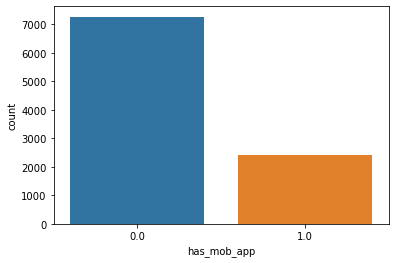

In [23]:
sns.countplot(x=cust['has_mob_app'])

<AxesSubplot:xlabel='phone_number', ylabel='count'>

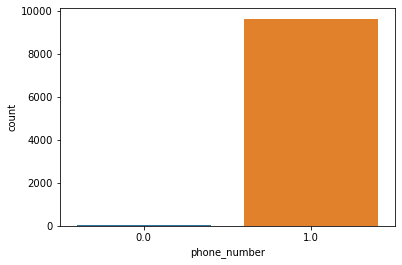

In [24]:
sns.countplot(x=cust['phone_number'])

<AxesSubplot:xlabel='country', ylabel='count'>

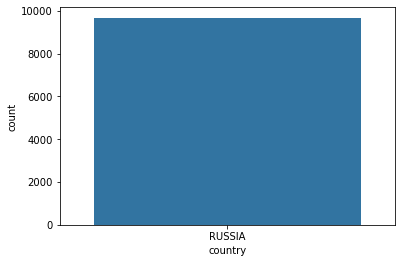

In [25]:
sns.countplot(x=cust.country)

In [26]:
trans_per_program = data.groupby('program_type')['transaction_amt'].sum()

In [27]:
trans_per_program.head()

program_type
Accounting, Auditing, and Bookkeeping Services        321974.92
Advertising Services                                 9677891.52
AeroFlot                                            12988090.32
Air Conditioning and Refrigeration Repair Shops         8245.00
Air France                                            104111.07
Name: transaction_amt, dtype: float64

In [28]:
cust.isna().sum()

uid1                       0
customer_age               0
country                    0
city_of_living             0
registration_dt            0
website_last_visit_date    0
email                      0
has_mob_app                0
phone_number               0
push                       0
dtype: int64

In [29]:
data2 = pd.merge(data,cust,on='uid1',how='left')

In [30]:
data2.head()

,uid1,date_pur,mcc_id,transaction_amt,transaction_qty,program_type,customer_age,country,city_of_living,registration_dt,website_last_visit_date,email,has_mob_app,phone_number,push
0,14164181,2020-09-10,5499,418.00,1,Miscellaneous Food Stores-Convenience Stores a...,50.0,RUSSIA,Samara,05.12.2017,14.12.2019,1.0,1.0,1.0,1.0
1,15453249,2020-08-10,5541,1034.00,1,Service Stations (with or without Ancillary Se...,63.0,RUSSIA,Perm,07.11.2017,08.05.2019,0.0,0.0,1.0,0.0
2,41571339,2020-09-12,5411,57.98,1,Grocery Stores and Supermarkets,22.0,RUSSIA,Novokuznetsk,13.11.2019,06.09.2020,0.0,1.0,1.0,1.0
3,2044223,2021-06-28,5921,549.40,4,"Package Stores--Beer, Wine, and Liquor",33.0,RUSSIA,Voronezh,13.10.2018,08.05.2020,0.0,0.0,1.0,0.0
4,33493259,2020-07-20,4121,578.00,2,Taxicabs and Limousines,24.0,RUSSIA,Voronezh,30.09.2016,27.07.2018,1.0,0.0,1.0,0.0


<ipython-input-31-17aa60d163ce>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(method='pearson'),annot=True)


<AxesSubplot:>

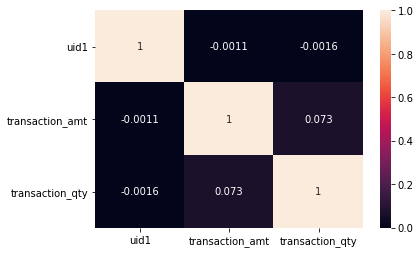

In [31]:
sns.heatmap(data.corr(method='pearson'),annot=True)

In [32]:

from sklearn.cluster import KMeans


import plotly.graph_objects as go

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le = LabelEncoder()

In [36]:
data2['program_type'] = le.fit_transform(data2['program_type'])

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float', 'str']

In [37]:
data2['city_of_living'] = le.fit_transform(data2['city_of_living'])

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float', 'str']

In [37]:
data2.isna().sum()

uid1                            0
date_pur                        0
mcc_id                          0
transaction_amt                 0
transaction_qty                 0
program_type                 4385
customer_age               136805
country                    136805
city_of_living             136805
registration_dt            136805
website_last_visit_date    136805
email                      136805
has_mob_app                136805
phone_number               136805
push                       136805
dtype: int64

In [38]:
data2.shape

(4710501, 15)

In [39]:
data2 = data2.dropna()

In [40]:
X = data2[['transaction_amt','customer_age','city_of_living','has_mob_app']]

In [41]:
# Implemeting Elbow Method to Determine Optimal Clusters

Sum_of_squared_distances = []
clus_range = range(1,12)
for k in clus_range:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(clus_range, Sum_of_squared_distances)
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k') #Showing 3 as optimal Clusters

ValueError: could not convert string to float: 'Samara'

In [42]:

kmean = KMeans(n_clusters =2,init='k-means++',random_state=2,algorithm='full')

kmean.fit(X)

clus=  kmean.predict(X)

ValueError: could not convert string to float: 'Samara'

In [43]:
#Showing Centroids

cent = kmean.cluster_centers_


print(cent)

AttributeError: 'KMeans' object has no attribute 'cluster_centers_'

In [ ]:
sns.countplot(x=clus)

# COHORT ANALYSIS

In [163]:
total=data2.assign(registration_dt = lambda x: pd.to_datetime(x.registration_dt), date_pur=lambda x: pd.to_datetime(x.date_pur))\
.iloc[:, [0, 9, 1]]

In [164]:
total.dtypes

uid1                        int64
registration_dt    datetime64[ns]
date_pur           datetime64[ns]
dtype: object

In [165]:
#I will choose clients for cohort analysis based on their transactions. 
#I am interested in first purchase after registration of each client
total1=total.groupby(['uid1', 'registration_dt'], as_index=False).agg({'date_pur':'min'})

In [166]:
#Check the days difference between purchase and registration
total1['diff']=total1.date_pur-total1.registration_dt

In [167]:
#These users made purchase at the same day after registration
cohorts0=total1.query('diff == "0 days"')
cohorts0

,uid1,registration_dt,date_pur,diff
15,87394,2021-04-23,2021-04-23,0 days
43,214067,2020-07-22,2020-07-22,0 days
50,285385,2021-08-25,2021-08-25,0 days
81,510110,2021-04-13,2021-04-13,0 days
86,536925,2020-01-14,2020-01-14,0 days
...,...,...,...,...
8848,52438253,2021-08-20,2021-08-20,0 days
8850,52439740,2020-07-16,2020-07-16,0 days
8860,52482542,2021-04-19,2021-04-19,0 days
8877,52592936,2020-07-29,2020-07-29,0 days


In [168]:
#We are interested in year-month date as we group clients by months
cohorts0=cohorts0.assign(registration_dt = lambda x: x.registration_dt.dt.to_period('M'))

In [223]:
cohorts0_graph=cohorts0.groupby("registration_dt", as_index=False).agg({'uid1':'count'})

In [131]:
cohort_df = (cohorts0
             .groupby('registration_dt')[['uid1']]
             .nunique()
             .assign(total = lambda x: x.groupby('registration_dt').agg({'uid1':'count'}))).reset_index()

In [132]:
cohort_df.uid1.sum()

507

In [133]:
cohort_df['proportion']=cohort_df['uid1']/507 * 100

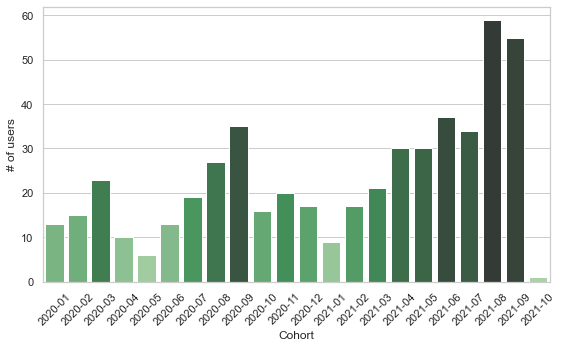

In [230]:
# THose clients who made purchase in the same day after registration

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Greens_d", len(cohorts0_graph))
rank = cohorts0_graph.uid1.argsort().argsort()   
plt.figure(figsize=(8, 5))
ax = sns.barplot(
  data=cohorts0_graph, 
  y='uid1', 
  x='registration_dt', 
  palette=np.array(pal)[rank]
  )
ax.set(xlabel='Cohort', ylabel='# of users')
## [Text(0.5, 0, 'Cohort'), Text(0, 0.5, '# of sellers')]
plt.xticks(rotation=45);
plt.tight_layout();
plt.show()

In [134]:
#Тhose who made purchase in the same day after registration. We see that best cohorts are "2021-08", "2021-09"
cohort_df

,registration_dt,uid1,total,proportion
0,2020-01,13,1,2.564103
1,2020-02,15,1,2.958580
2,2020-03,23,1,4.536489
3,2020-04,10,1,1.972387
4,2020-05,6,1,1.183432
5,2020-06,13,1,2.564103
6,2020-07,19,1,3.747535
7,2020-08,27,1,5.325444
8,2020-09,35,1,6.903353
9,2020-10,16,1,3.155819


In [181]:
#Let's decide that we need clients who made purchases only in first month after registration
cohort_month=total1.loc[total1['diff'] <= "31 days"]

In [182]:
#We drop all negative days as purchase can only be after registration
cohort_month=cohort_month.loc[cohort_month['diff'] >= "0 days"]

,uid1,registration_dt,date_pur,diff
1,17264,2020-07-21,2020-07-22,1 days
6,36241,2021-08-28,2021-09-04,7 days
10,49025,2021-07-22,2021-07-23,1 days
15,87394,2021-04-23,2021-04-23,0 days
17,101932,2019-12-22,2020-01-04,13 days
...,...,...,...,...
8862,52505259,2021-04-18,2021-04-19,1 days
8864,52513093,2021-08-24,2021-08-25,1 days
8877,52592936,2020-07-29,2020-07-29,0 days
8886,52657112,2020-09-30,2020-10-02,2 days


In [187]:
cohort_df_month = (cohort_month
             .groupby(['registration_dt', 'diff'])[['uid1']]
             .nunique()
             .assign(total = lambda x: x.groupby(['registration_dt', 'diff']).agg({'uid1':'count'}))).reset_index()

In [209]:
cohort_df_month=cohort_df_month.groupby(['registration_dt','diff'], as_index=False).agg({'uid1':'sum'})

In [213]:
cohort_df_month['proportion']=100*(cohort_df_month.uid1/cohort_df_month.uid1.sum())

In [215]:
cohort_pivot = (
  cohort_df_month[['registration_dt', 'diff', 'proportion']]
  .pivot(columns='diff', index='registration_dt')['proportion']
  )
cohort_pivot

diff,0 days,1 days,2 days,3 days,4 days,5 days,6 days,7 days,8 days,9 days,...,21 days,22 days,23 days,24 days,25 days,26 days,28 days,29 days,30 days,31 days
registration_dt,,,,,,,,,,,,,,,,,,,,,
2019-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.23511,0.15674,0.07837,...,0.15674,0.23511,0.31348,0.23511,0.31348,NaN,0.07837,NaN,0.07837,0.15674
2020-01,1.018809,0.705329,0.391850,0.078370,0.156740,0.156740,0.15674,0.07837,0.07837,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.07837,NaN
2020-02,1.175549,0.862069,0.156740,0.078370,0.078370,NaN,0.07837,0.15674,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.07837,0.15674,0.07837,NaN
2020-03,1.802508,1.332288,0.391850,0.313480,0.078370,NaN,0.23511,NaN,0.07837,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.07837,NaN,NaN,NaN
2020-04,0.783699,0.391850,0.078370,0.078370,0.078370,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.07837,NaN,NaN,NaN,NaN,NaN
2020-05,0.470219,0.235110,0.235110,0.313480,NaN,NaN,0.15674,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.15674,NaN
2020-06,1.018809,0.705329,0.391850,NaN,NaN,NaN,NaN,NaN,0.15674,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.15674,NaN,NaN
2020-07,1.489028,0.705329,0.235110,NaN,0.078370,0.078370,NaN,NaN,0.07837,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.07837,NaN
2020-08,2.115987,0.626959,0.313480,0.313480,0.156740,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.07837,NaN,NaN,0.07837,NaN


### Summary of cohort analysis
We see that the best cohorts of clients are "2021-08", "2021-09" as they did purchases very quickly after registration.

The worst cohort is "2021-10" as clients don't purchase much

# RFM Analysis


In [44]:
temp=['uid1', 'mcc_id', 'date_pur', 'transaction_amt']
RFM_data=data2[temp]
RFM_data.shape

(4569431, 4)

In [45]:
NOW = dt.datetime(2021,10,12)
#Convert ORDERDATE to datetime format.
RFM_data['date_pur'] = pd.to_datetime(RFM_data['date_pur'])
# RFM Table
RFM_table=RFM_data.groupby('uid1').agg({'date_pur': lambda x: (NOW - x.max()).days, # Recency
                                                'mcc_id': lambda x: len(x.unique()), # Frequency
                                                'transaction_amt': lambda x: x.sum()})    # Monetary 

RFM_table['date_pur'] = RFM_table['date_pur'].astype(int)

RFM_table.rename(columns={'date_pur': 'recency', 
                         'mcc_id': 'frequency',
                         'transaction_amt': 'monetary_value'}, inplace=True)
RFM_table.head()

<ipython-input-45-c1bfbd7af794>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM_data['date_pur'] = pd.to_datetime(RFM_data['date_pur'])


,recency,frequency,monetary_value
uid1,,,
8388,1,21,127141.34
17264,4,51,153450.45
17373,14,23,911493.93
26297,0,33,174610.41
27044,0,67,924970.73


In [46]:
quantiles = RFM_table.quantile(q=[0.25,0.5,0.75])
quantiles

,recency,frequency,monetary_value
0.25,0.0,18.0,79191.200
0.50,1.0,31.0,233571.430
0.75,4.0,44.0,489861.995


In [47]:
# Converting quantiles to a dictionary, easier to use.
quantiles = quantiles.to_dict()
##  RFM Segmentation ----
RFM_Segment = RFM_table.copy()
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def R_Class(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FM_Class(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
RFM_Segment['R_Quartile'] = RFM_Segment['recency'].apply(R_Class, args=('recency',quantiles,))
RFM_Segment['F_Quartile'] = RFM_Segment['frequency'].apply(FM_Class, args=('frequency',quantiles,))
RFM_Segment['M_Quartile'] = RFM_Segment['monetary_value'].apply(FM_Class, args=('monetary_value',quantiles,))
RFM_Segment['RFMClass'] = RFM_Segment.R_Quartile.map(str) \
                            + RFM_Segment.F_Quartile.map(str) \
                            + RFM_Segment.M_Quartile.map(str)

## Questions we are trying to answer

### Who are my best customers?

In [48]:
#RFMClass = 444
RFM_Segment[RFM_Segment['RFMClass']=='444'].sort_values('monetary_value', ascending=False).head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
uid1,,,,,,,
27133536,0,110,26914050.48,4,4,4,444
18520366,0,101,22190329.33,4,4,4,444
15709356,0,108,13562230.03,4,4,4,444
26250517,0,68,11421496.80,4,4,4,444
29926955,0,93,11415221.83,4,4,4,444


### Which customers are at the verge of churning?

In [49]:
#Customers who's recency value is low

RFM_Segment[RFM_Segment['R_Quartile'] <= 2 ].sort_values('monetary_value', ascending=False).head(5)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
uid1,,,,,,,
10444700,19,23,5511050.03,1,2,4,124
20332557,5,72,5091035.19,1,4,4,144
2913375,3,66,3849291.65,2,4,4,244
18822539,162,46,2981355.38,1,4,4,144
35627692,2,78,2734628.58,2,4,4,244


### Who are the lost customers?


In [50]:
#Customers who's recency, frequency as well as monetary values are low 

RFM_Segment[RFM_Segment['RFMClass']=='111'].sort_values('recency',ascending=False).head(5)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
uid1,,,,,,,
20653378,648,1,100.00,1,1,1,111
24951087,647,1,1000.00,1,1,1,111
51021996,646,1,0.00,1,1,1,111
30750279,641,1,0.00,1,1,1,111
42476944,638,5,3810.76,1,1,1,111


### Who are loyal customers?

In [51]:
#Customers with high frequency value

RFM_Segment[RFM_Segment['F_Quartile'] >= 3 ].sort_values('monetary_value', ascending=False).head(5)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
uid1,,,,,,,
27133536,0,110,26914050.48,4,4,4,444
18520366,0,101,22190329.33,4,4,4,444
15709356,0,108,13562230.03,4,4,4,444
26250517,0,68,11421496.80,4,4,4,444
29926955,0,93,11415221.83,4,4,4,444
